In [35]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

In [36]:
df =pd.read_excel("Wholesale customers data.xlsx", index =False,inplace=True)

In [37]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [38]:
df.set_index("Channel")

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
1,3,29703,12051,16027,13135,182,2204
1,3,39228,1431,764,4510,93,2346
2,3,14531,15488,30243,437,14841,1867


In [39]:
df['Channel'].replace(to_replace=1,value=0, inplace=True)
df['Channel'].replace(to_replace=2,value=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


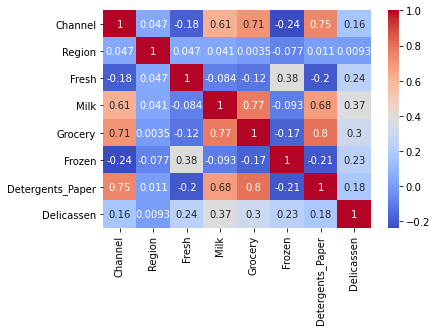

In [41]:
sns.heatmap(df.corr(method='spearman'), annot = True,cmap= 'coolwarm')

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [43]:
col_names = list(df.columns)

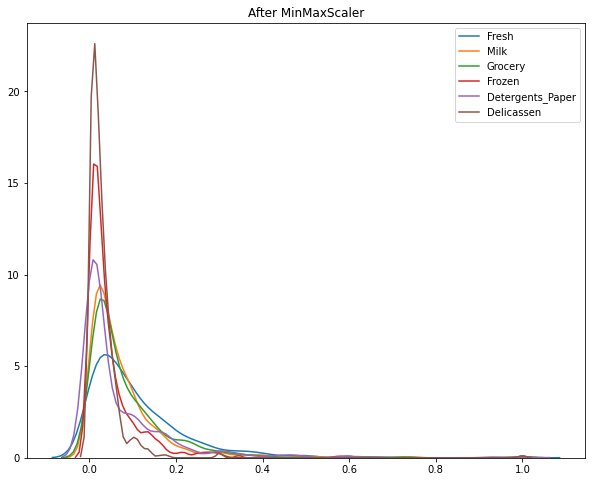

In [44]:
scaler = MinMaxScaler()
df_mm=scaler.fit_transform(df)
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['Fresh'], ax=ax1)
sns.kdeplot(df_mm['Milk'], ax=ax1)
sns.kdeplot(df_mm['Grocery'], ax=ax1)
sns.kdeplot(df_mm['Frozen'], ax=ax1)
sns.kdeplot(df_mm['Detergents_Paper'], ax=ax1)
sns.kdeplot(df_mm['Delicassen'], ax=ax1)

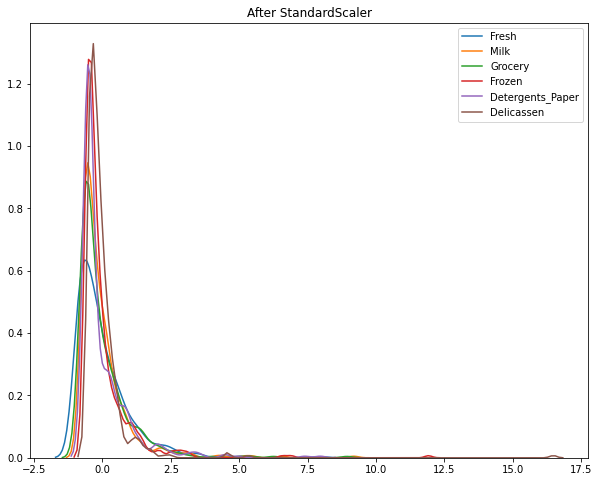

In [45]:
scaler1 = StandardScaler()
df_m = scaler1.fit_transform(df)
df_m = pd.DataFrame(df_m, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_m['Fresh'], ax=ax1)
sns.kdeplot(df_m['Milk'], ax=ax1)
sns.kdeplot(df_m['Grocery'], ax=ax1)
sns.kdeplot(df_m['Frozen'], ax=ax1)
sns.kdeplot(df_m['Detergents_Paper'], ax=ax1)
sns.kdeplot(df_m['Delicassen'], ax=ax1)

StandardScaler is useful for the features that follow a Normal distribution. This is clearly illustrated in the image above. Data is normalised on both sides of zero.

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [47]:
print(df['Channel'])

0      1
1      1
2      1
3      0
4      1
      ..
435    0
436    0
437    1
438    0
439    0
Name: Channel, Length: 440, dtype: int64


In [34]:
X = df.drop('Channel',axis = 1)
target = df['Channel']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [48]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 6


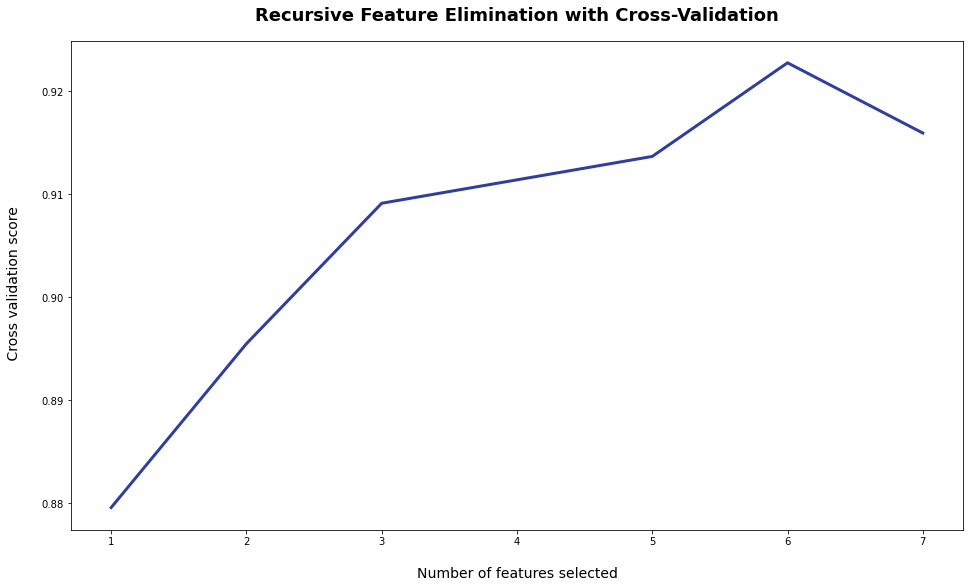

In [49]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel(' Cross validation score', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [50]:
from sklearn.cluster import KMeans
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

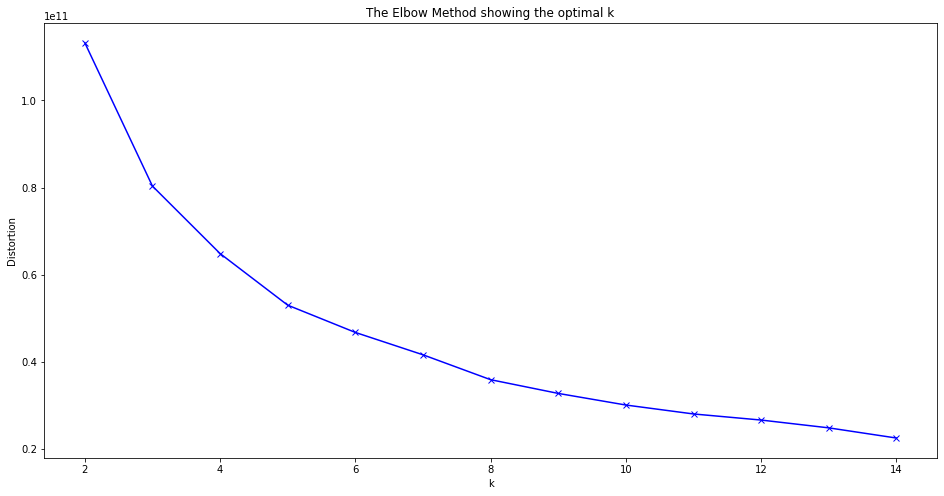

In [51]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From above graph value of k can be assumed as 8

In [52]:
from sklearn.decomposition import PCA

In [55]:
n=8
pca = PCA(8)
data = pca.fit_transform(df)

In [56]:
for i in range(1,n+1):
    print("The total variance explained by the first {} principle component{} is {}.".format(
            i,
            " " if i == 1 else "s",
            sum(pca.explained_variance_ratio_[0:i])
    ))

The total variance explained by the first 1 principle component  is 0.4596136157788315.
The total variance explained by the first 2 principle components is 0.8647858832196771.
The total variance explained by the first 3 principle components is 0.9348159635455102.
The total variance explained by the first 4 principle components is 0.9788394069877696.
The total variance explained by the first 5 principle components is 0.9938615229078218.
The total variance explained by the first 6 principle components is 0.9999999980008126.
The total variance explained by the first 7 principle components is 0.9999999996600024.
The total variance explained by the first 8 principle components is 1.0000000000000002.


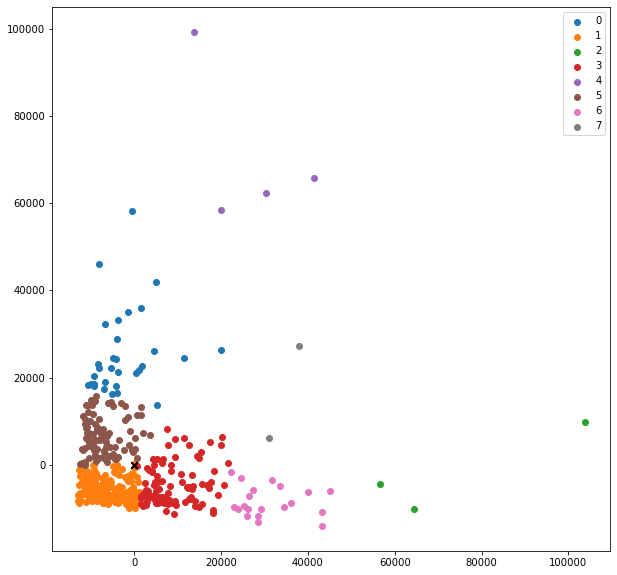

In [91]:
centers = np.array(kmeanModel.cluster_centers_)
model = KMeans(n_clusters = 8, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()

In [58]:
import xgboost as xgb
import xgboost as cv

In [74]:
X = df.drop('Channel', axis=1)

y = df['Channel']

In [75]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [76]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Channel, dtype: int64

In [77]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [79]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[22:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [81]:
y_pred = xgb_clf.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        86
           1       0.86      0.78      0.82        46

    accuracy                           0.88       132
   macro avg       0.87      0.86      0.86       132
weighted avg       0.88      0.88      0.88       132

